In this notebook, we check that the distance does not influence the SNR that is found, as predicted b the matched filtering theory and look at how the weveform can evolve with this parameter.

Text(0.5,1,'Model of the waveform used')

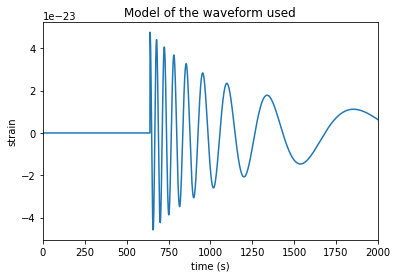

In [39]:
from pycbc.catalog import Merger
from pycbc.waveform import get_fd_waveform
import matplotlib.pyplot as plt
from pycbc.filter import matched_filter
from pycbc.waveform import get_td_waveform

data = Merger('GW170814').strain('L1')

hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=20.0, delta_f=data.delta_f, f_final=739.0645)
template=hp.cyclic_time_shift(hp.start_time)
plt.plot(template)
plt.xlim(0,2000)
plt.ylabel("strain")
plt.xlabel("time (s)")
plt.title("Model of the waveform used")

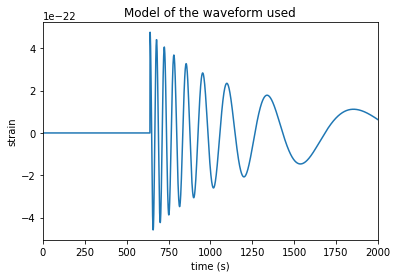

In [19]:
#division of the distance by 10
hp10, hf10 = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=54, inclination=0.6,
                         f_lower=20.0, delta_f=data.delta_f, f_final=739.0645)
template10=hp10.cyclic_time_shift(hp10.start_time)
plt.plot(template10)
plt.xlim(0,2000)
plt.ylabel("strain")
plt.xlabel("time (s)")
plt.title("Model of the waveform used")
plt.show()

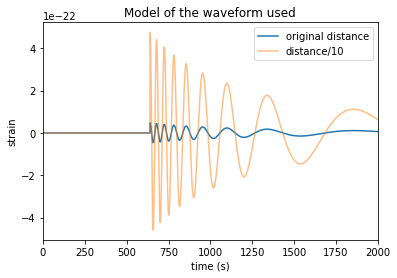

In [20]:
plt.plot(template, alpha=1, label="original distance")
plt.plot(template10, alpha=0.5, label='distance/10')
plt.xlim(0,2000)
plt.ylabel("strain")
plt.xlabel("time (s)")
plt.title("Model of the waveform used")
plt.legend(loc='best')
plt.grid
plt.show()

We see that the waveform depends on the distance at which we are (at least for the amplitude). Still, its general form ramains the same and we see that the oscilliations take place at the same times in the domain. We can see the impact of this change in amplitude on the data analysis.

Text(0.5,1,'PSD for the  L1 detector')

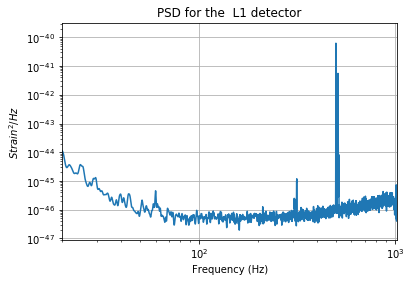

In [21]:
import numpy as np
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.psd import interpolate, inverse_spectrum_truncation

#we build the PSD based on the normal data, in the classical
data = data.highpass_fir(15,512)
data = resample_to_delta_t(data, 1.0/2048)
data = data.crop(2,2)

psd = data.psd(2)
psd = interpolate(psd, data.delta_f)
psd = inverse_spectrum_truncation(psd, 2*data.sample_rate, low_frequency_cutoff = 15.0)

plt.loglog(psd.sample_frequencies, psd)
plt.xlim(20, 1024)
plt.ylabel("$Strain^2 / Hz$")
plt.xlabel("Frequency (Hz)")
plt.grid()
plt.title("PSD for the  L1 detector")

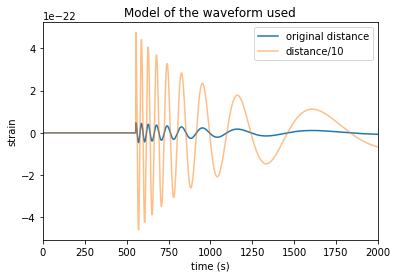

In [7]:
#we recompute the two waveforms based on the PSD that has been computed

hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=20.0, delta_f=data.delta_f, f_final=739.0645)
hp.resize(len(psd))
template = hp.cyclic_time_shift(hp.start_time)

hp10, hf10 = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=54, inclination=0.6,
                         f_lower=20.0, delta_f=data.delta_f, f_final=739.0645)
hp10.resize(len(psd))
template10 = hp10.cyclic_time_shift(hp10.start_time)

plt.plot(template, alpha=1, label="original distance")
plt.plot(template10, alpha=0.5, label='distance/10')
plt.xlim(0,2000)
plt.ylabel("strain")
plt.xlabel("time (s)")
plt.title("Model of the waveform used")
plt.legend(loc='best')
plt.grid
plt.show()

We found a signal at 1186741861.5244141s with a SNR of 13.0505848 for the 540Mpc distance and a signal at 1186741861.5244141s with a SNR of 13.0505848 for the 54Mpc case


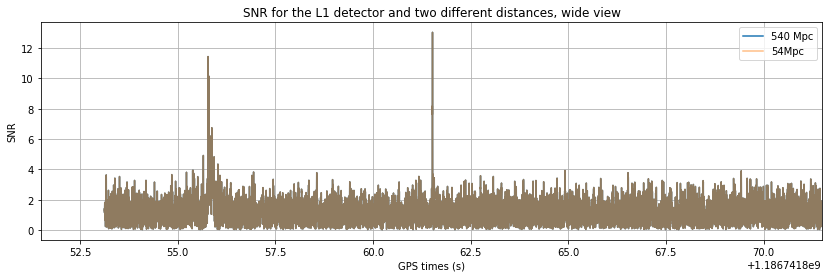

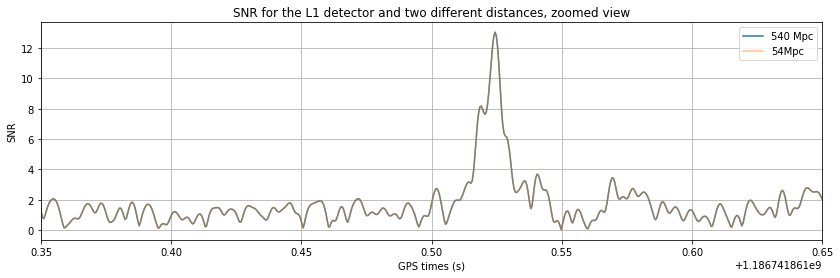

In [6]:
snrNorm = matched_filter(template, data, psd=psd, low_frequency_cutoff = 15.)
snrNorm = snrNorm.crop(5,4)
snr10 = matched_filter(template10, data, psd=psd, low_frequency_cutoff = 15.0)
snr10 = snr10.crop(5,4)

for w, title in [(10, "SNR for the L1 detector and two different distances, wide view"),
                (0.15, "SNR for the L1 detector and two different distances, zoomed view")]:
    plt.figure(figsize=[14,4])
    plt.plot(snrNorm.sample_times, abs(snrNorm), label="540 Mpc")
    plt.plot(snr10.sample_times, abs(snr10), alpha=0.5, label="54Mpc")
    if (w==10):
        peak = abs(snrNorm).numpy().argmax()
        snrp = snrNorm[peak]
        time = snrNorm.sample_times[peak]
        peak10 = abs(snr10).numpy().argmax()
        snrp10 = snr10[peak10]
        time10 = snr10.sample_times[peak10]
        print("We found a signal at %.7fs with a SNR of %.7f for the 540Mpc distance and a signal at %.7fs with a SNR of %.7f for the 54Mpc case" %(time, abs(snrp), time10, abs(snrp10)))
    plt.title(title)
    plt.grid()
    plt.xlim(Merger('GW170814').time-w, Merger('GW170814').time+w)
    plt.xlabel("GPS times (s)")
    plt.ylabel("SNR")
    plt.legend(loc='best')

We see that, even ifthe template has a higher amplitude when the distance is divided by 10, the SNR that is found is the same. This shows that, as long as the shape curve is still the same, we get the same result. Here, the shape is unchanged, as can be seen in the fact that the crest stay at the same place. 

Another paremeter the shoudl leave this shape unchanged is the inclintion.

Text(0.5,1,'Model of the waveform used')

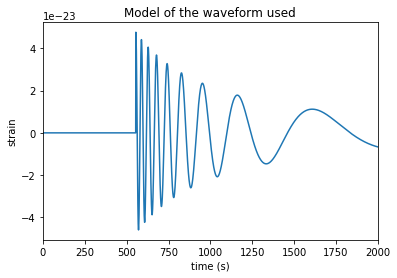

In [23]:
hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=20.0, delta_f=data.delta_f, f_final=739.0645)
hp.resize(len(psd))
template=hp.cyclic_time_shift(hp.start_time)
plt.plot(template)
plt.xlim(0,2000)
plt.ylabel("strain")
plt.xlabel("time (s)")
plt.title("Model of the waveform used")

Text(0.5,1,'Model of the waveform used')

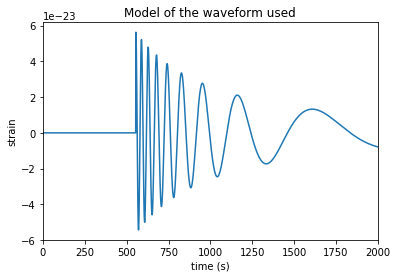

In [24]:
hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.1,
                         f_lower=20.0, delta_f=data.delta_f, f_final=739.0645)
hp.resize(len(psd))
template01=hp.cyclic_time_shift(hp.start_time)
plt.plot(template01)
plt.xlim(0,2000)
plt.ylabel("strain")
plt.xlabel("time (s)")
plt.title("Model of the waveform used")

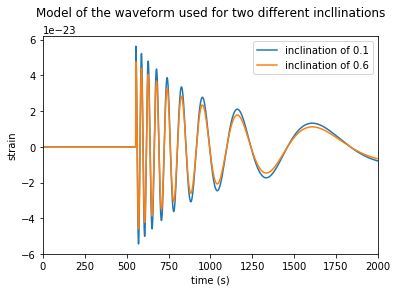

In [34]:
plt.plot(template01, label="inclination of 0.1")
plt.plot(template, label="inclination of 0.6")
plt.xlim(0,2000)
plt.ylabel("strain")
plt.xlabel("time (s)")
plt.title("Model of the waveform used for two different incllinations", pad=20)
plt.legend(loc='best')

Here we also see that only the ampltude of the wevaform is change and not the places of its crests. So, we expected it to give the same SNR at the end.

We found a signal at 1186741861.5244141s with a SNR of 13.0505848 for the 540Mpc distance and a signal at 1186741861.5244141s with a SNR of 13.0505848 for the 54Mpc case


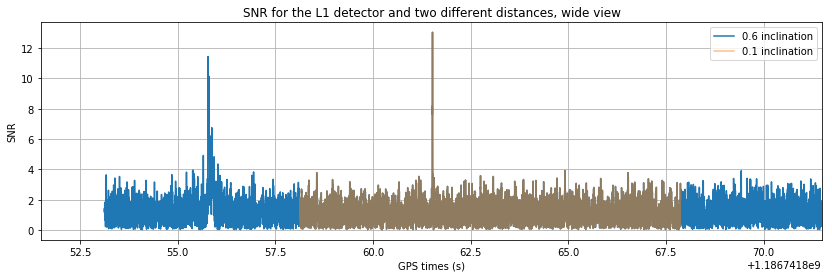

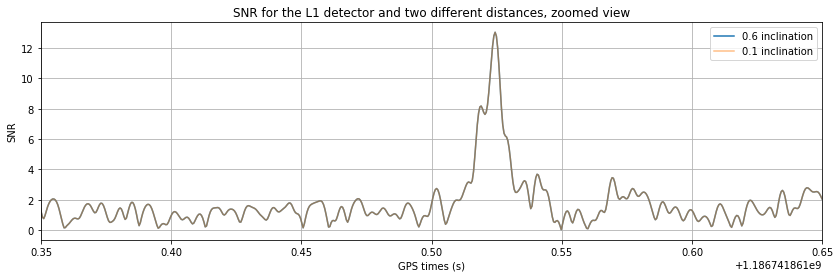

In [26]:
snrNorm = matched_filter(template, data, psd=psd, low_frequency_cutoff = 15.)
snrNorm = snrNorm.crop(5,4)
snr01 = matched_filter(template01, data, psd=psd, low_frequency_cutoff = 15.0)
snr01 = snr10.crop(5,4)

for w, title in [(10, "SNR for the L1 detector and two different distances, wide view"),
                (0.15, "SNR for the L1 detector and two different distances, zoomed view")]:
    plt.figure(figsize=[14,4])
    plt.plot(snrNorm.sample_times, abs(snrNorm), label="0.6 inclination")
    plt.plot(snr01.sample_times, abs(snr01), alpha=0.5, label="0.1 inclination")
    if (w==10):
        peak = abs(snrNorm).numpy().argmax()
        snrp = snrNorm[peak]
        time = snrNorm.sample_times[peak]
        peak10 = abs(snr10).numpy().argmax()
        snrp10 = snr10[peak10]
        time10 = snr10.sample_times[peak10]
        print("We found a signal at %.7fs with a SNR of %.7f for the 540Mpc distance and a signal at %.7fs with a SNR of %.7f for the 54Mpc case" %(time, abs(snrp), time10, abs(snrp10)))
    plt.title(title)
    plt.grid()
    plt.xlim(Merger('GW170814').time-w, Merger('GW170814').time+w)
    plt.xlabel("GPS times (s)")
    plt.ylabel("SNR")
    plt.legend(loc='best')

We can change the different parameters to see which are the ones that influence the GW at the end.

The masss and spins have already be shown to change the analysis as they ompletely shift the crests that are present

Wr first look for the lowest frequency, where the value is 20Hz normally. We look what happens when it is lower or higher

In [29]:
hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=20.0, delta_f=data.delta_f, f_final=739.0645)
hp.resize(len(psd))
template = hp.cyclic_time_shift(hp.start_time)


hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=10.0, delta_f=data.delta_f, f_final=739.0645)
hp.resize(len(psd))
template_low = hp.cyclic_time_shift(hp.start_time)

hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=30.0, delta_f=data.delta_f, f_final=739.0645)
hp.resize(len(psd))
template_high = hp.cyclic_time_shift(hp.start_time)

(0, 1000)

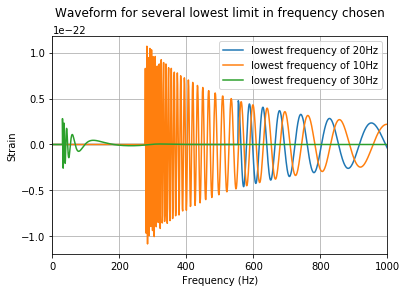

In [38]:
plt.plot(template, label='lowest frequency of 20Hz')
plt.plot(template_low, label='lowest frequency of 10Hz')
plt.plot(template_high.sample_frequencies, template_high, label='lowest frequency of 30Hz')
plt.title("Waveform for several lowest limit in frequency chosen", pad=20)
plt.grid()
plt.legend(loc="best")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Strain")
plt.xlim(0,1000)

In [54]:
hp, hf = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=20.0, delta_t=1.0/4096, f_final=739.0645)
hp.resize(len(psd))
template = hp.cyclic_time_shift(hp.start_time)


hp, hf = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=10.0, delta_t=1.0/4096, f_final=739.0645)
hp.resize(len(psd))
template_low = hp.cyclic_time_shift(hp.start_time)

hp, hf = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=30.0, delta_t=1.0/4096, f_final=739.0645)
hp.resize(len(psd))
template_high = hp.cyclic_time_shift(hp.start_time)

(0, 1000)

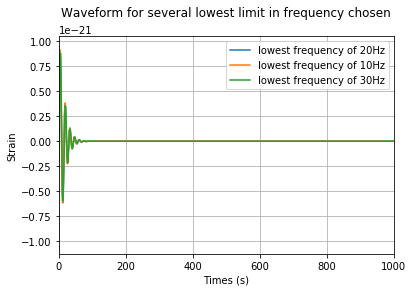

In [50]:
plt.plot(template, label='lowest frequency of 20Hz')
plt.plot(template_low, label='lowest frequency of 10Hz')
plt.plot( template_high, label='lowest frequency of 30Hz')
plt.title("Waveform for several lowest limit in frequency chosen", pad=20)
plt.grid()
plt.legend(loc="best")
plt.xlabel("Times (s)")
plt.ylabel("Strain")
plt.xlim(0,1000)